In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymc3_hmm.utils import plot_split_timeseries

# Visualizing Datasets That Failed To Fit Properly

In this notebook we will cherry pick a handful of datasets that failed to fit properly during the latest metaflow run on demo_id 11 across all DMA's and networks. Identifying failed series, as well as the associated error, can be accomplished with the following query:

In [ ]:
"""
Select
  split_part(split_part(model_fit,'=',2),'/',1) dma_code,
  count(1)
from
  python_model_execution.model_errors
group by
  split_part(split_part(model_fit,'=',2),'/',1)
order by
  count(1) desc;
"""

# Summary

In total there were

* 3426 "Bad initial energy" errors
* ~20 "Mass matrix contiains zeros on the diagonals" errors

So _most_ of our problems are related to the bad initial energy issue. Below are 5 data sets hand picked based on the errors. The (dma-demo-network) triple is shown for reference.
    
* [Mass matrix contains zeros on the diagonal (764-11-155)](#first)
* [Mass matrix contains zeros on the diagonal (691-11-497)](#second)
* [Bad initial energy (602-11-764)](#third)
* [Bad initial energy (801-11-889)](#fourth)
* [Bad initial energy (752-11-150)](#fifth)

# Case Study #1: DMA = 764, Demo = 11, Network ID = 155 <a class="anchor" id="first"></a>

### Full Error:

**Mass matrix contains zeros on the diagonal**. \nThe derivative of RV `xi_nm`.ravel()[0] is zero.\nThe derivative of RV `xi_nm`.ravel()[1] is zero.\nThe derivative of RV `xi_nm`.ravel()[2] is zero.\nThe derivative of RV `xi_nm`.ravel()[3] is zero.\nThe derivative of RV `xi_nm`.ravel()[4] is zero.\nThe derivative of RV `xi_nm`.ravel()[5] is zero.\nThe derivative of RV `xi_nm`.ravel()[6] is zero.\nThe derivative of RV `xi_nm`.ravel()[7] is zero.\nThe derivative of RV `xi_nm`.ravel()[8] is zero.\nThe derivative of RV `xi_nm`.ravel()[9] is zero.....

{plus many more lines similar to this)

In [2]:
df = pd.read_parquet('s3://ncc-datasci-dev/impressions_pop_dmn/dma_code=764/demo_id=11/network_id=155')
df.head()

Enter MFA code for arn:aws:iam::347488477921:mfa/jane.thompson: ········


,dt,impressions,population_size,demo_id,dma_code,network_id,demo_gender,demo_age_range,market,network
0,2018-10-27 16:45:00,32,66472.0,11,764,155,A,25-54,Rapid City,The Weather Channel
1,2019-03-14 12:30:00,114,66472.0,11,764,155,A,25-54,Rapid City,The Weather Channel
2,2018-10-30 06:45:00,30,66472.0,11,764,155,A,25-54,Rapid City,The Weather Channel
3,2018-10-26 11:15:00,19,66472.0,11,764,155,A,25-54,Rapid City,The Weather Channel
4,2018-11-01 08:45:00,39,66472.0,11,764,155,A,25-54,Rapid City,The Weather Channel


In [3]:
plot_data = df.set_index('dt')[['impressions']]
plot_data

,impressions
dt,
2018-10-27 16:45:00,32
2019-03-14 12:30:00,114
2018-10-30 06:45:00,30
2018-10-26 11:15:00,19
2018-11-01 08:45:00,39
...,...
2019-11-22 05:30:00,24
2019-11-24 04:00:00,13
2019-11-27 01:45:00,10


# Monthly Visual

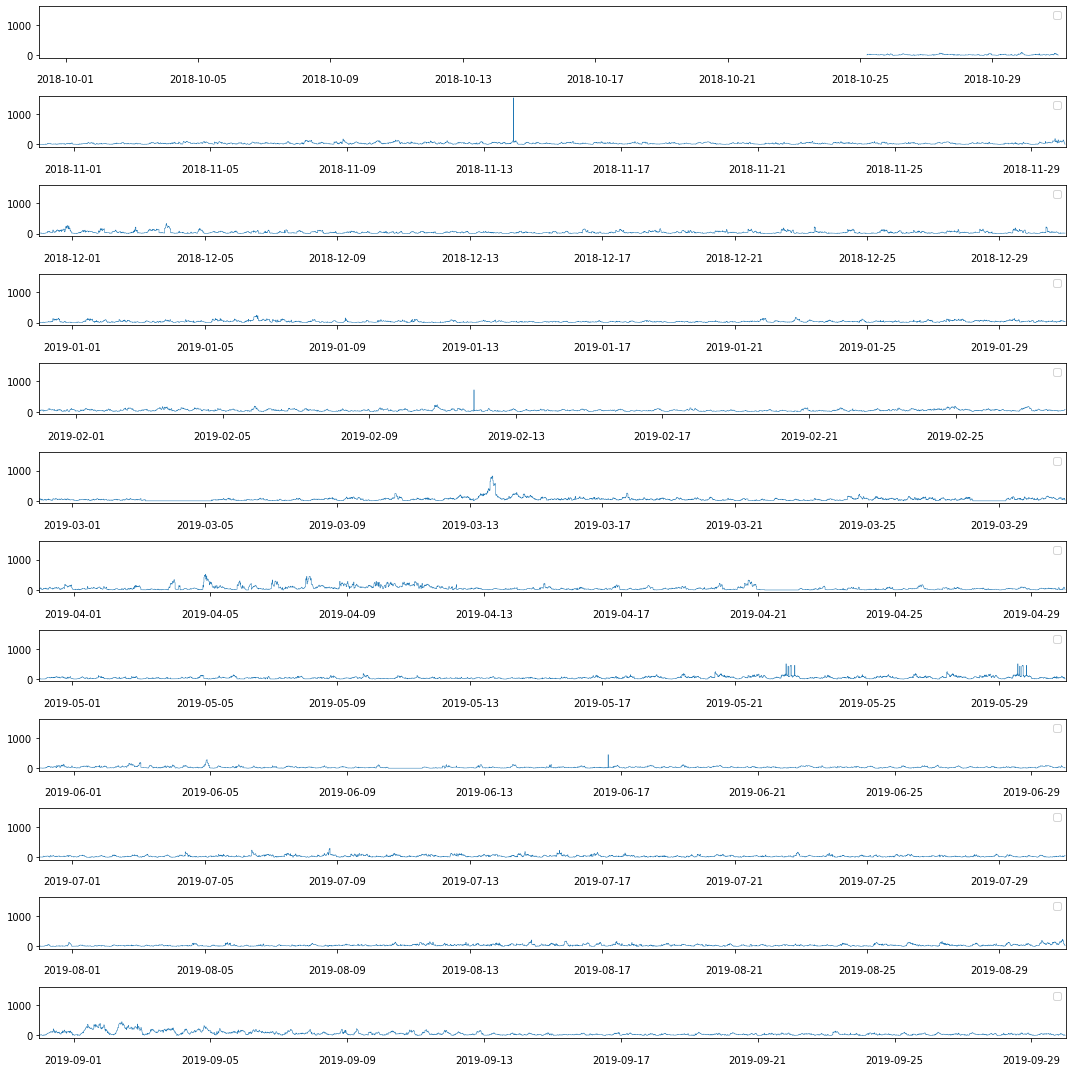

In [4]:
plot_split_timeseries(plot_data, split_freq = "1M", split_max = 12)
plt.tight_layout()

# Weekly Visual

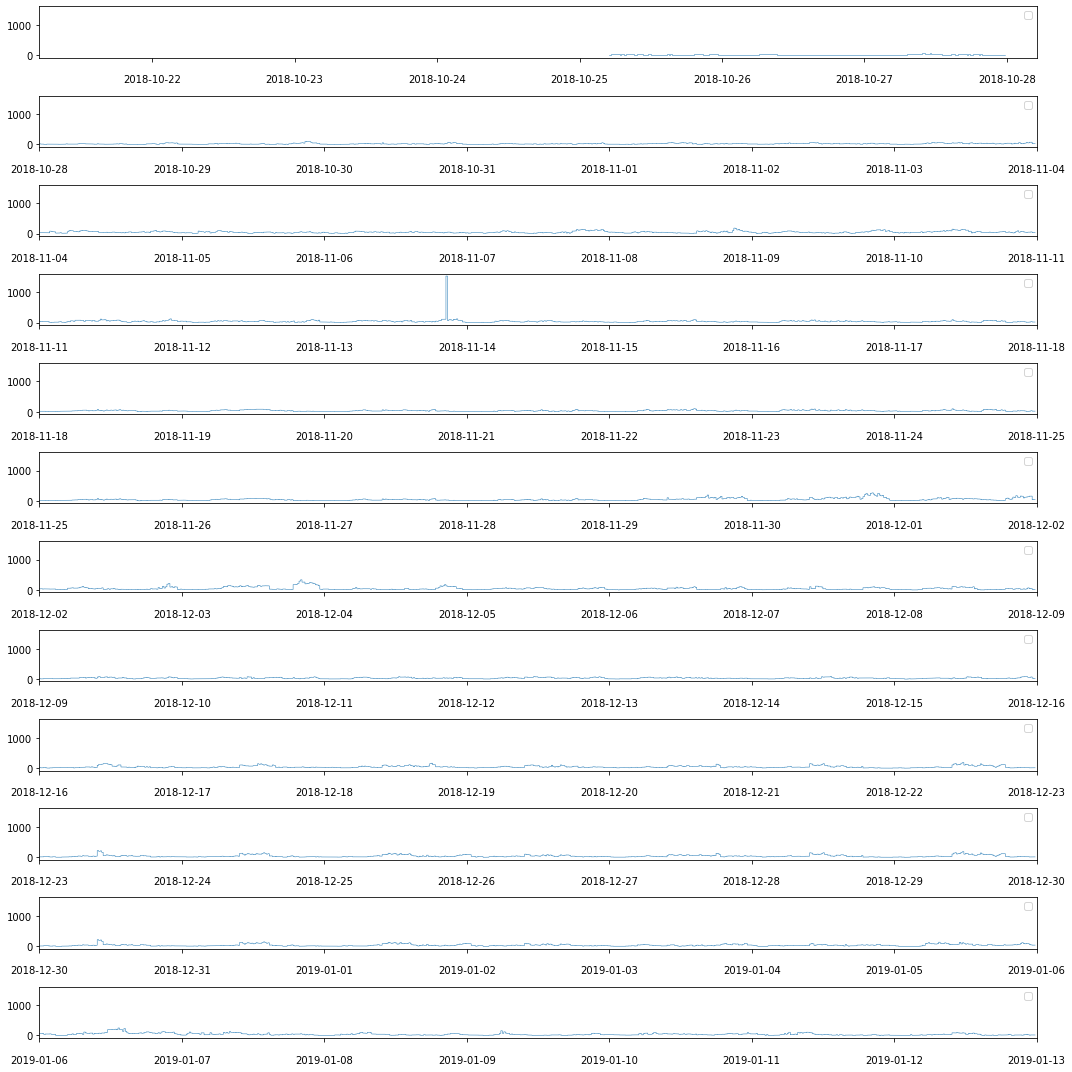

In [5]:
plot_split_timeseries(plot_data, split_freq = "1W", split_max = 12)
plt.tight_layout()

Takeaway: It seems like this issue here is "long periods of close to 0 impressions" sprinkled with an infrequent spike close to 1,000 impressions

# Case Study # 2: DMA = 691, Demo = 11, Network = 497 <a class="anchor" id="second">

### Full Error:

**Mass matrix contains zeros on the diagonal**. \nThe derivative of RV xi_nm.ravel()[0] is zero.\nThe derivative of RV xi_nm.ravel()[1] is zero.\nThe derivative of RV xi_nm.ravel()[2] is zero.\nThe derivative of RV xi_nm.ravel()[3] is zero.\nThe derivative of RV xi_nm.ravel()[4] is zero.\nThe derivative of RV xi_nm.ravel()[5] is zero.\nThe derivative of RV xi_nm.ravel()[6] is zero.\nThe derivative of RV xi_nm.ravel()[7] is zero.\nThe derivative of RV xi_nm.ravel()[8] is zero.\nThe derivative of RV xi_nm.ravel()[9] is zero.....

{plus many more lines similar to this)

In [6]:
df2 = pd.read_parquet('s3://ncc-datasci-dev/impressions_pop_dmn/dma_code=691/demo_id=11/network_id=497')

In [7]:
df2.head()

,dt,impressions,population_size,demo_id,dma_code,network_id,demo_gender,demo_age_range,market,network
0,2018-10-25 06:15:00,103,309453.0,11,691,497,A,25-54,Huntsville,E! Entertainment TV
1,2018-10-27 00:45:00,120,309453.0,11,691,497,A,25-54,Huntsville,E! Entertainment TV
2,2018-10-27 05:30:00,63,309453.0,11,691,497,A,25-54,Huntsville,E! Entertainment TV
3,2018-10-26 13:15:00,319,309453.0,11,691,497,A,25-54,Huntsville,E! Entertainment TV
4,2018-10-26 04:00:00,81,309453.0,11,691,497,A,25-54,Huntsville,E! Entertainment TV


In [8]:
plot_data = df2.set_index('dt')[['impressions']]
plot_data

,impressions
dt,
2018-10-25 06:15:00,103
2018-10-27 00:45:00,120
2018-10-27 05:30:00,63
2018-10-26 13:15:00,319
2018-10-26 04:00:00,81
...,...
2019-11-22 03:15:00,407
2019-11-25 16:15:00,431
2019-11-29 09:45:00,376


# Monthly Visual

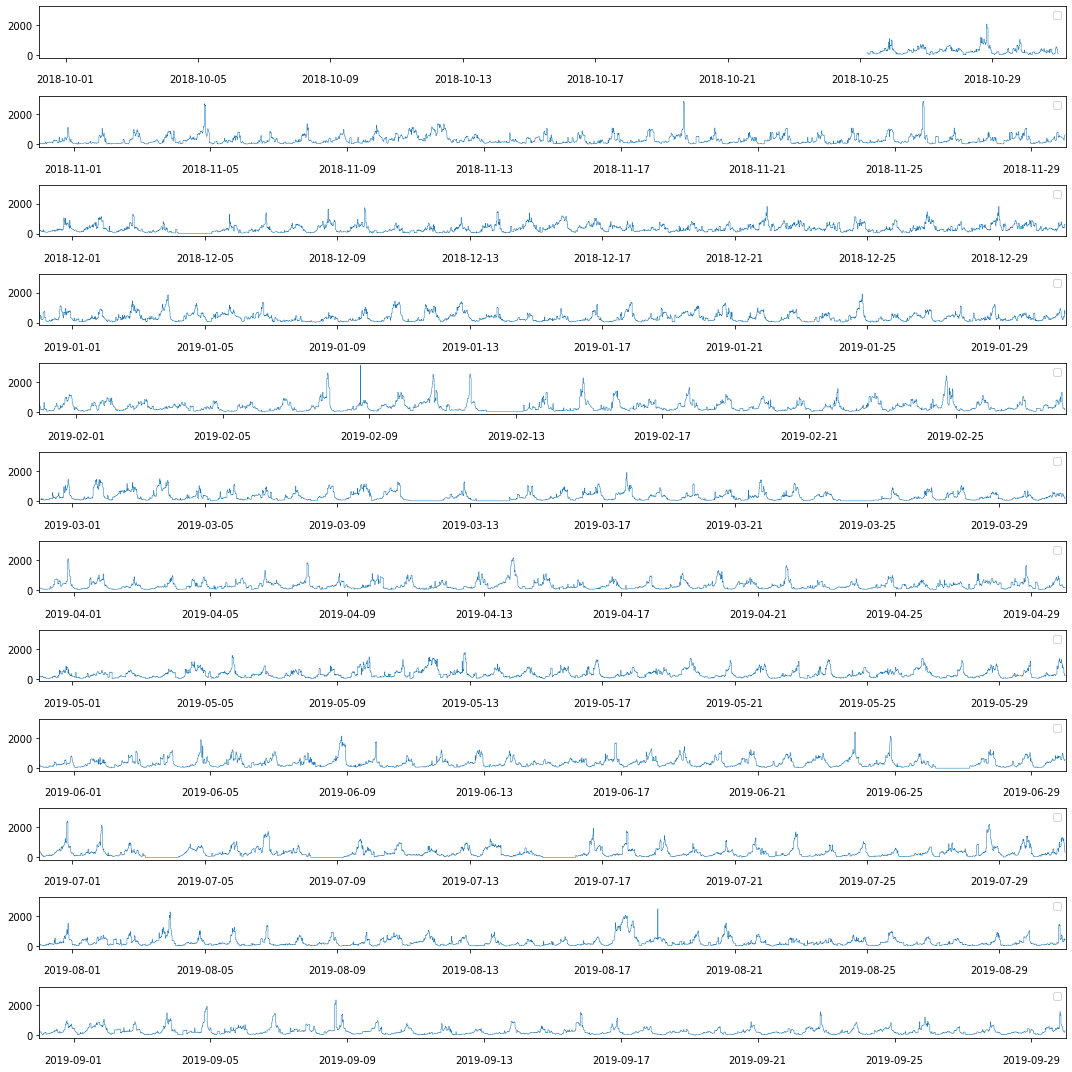

In [9]:
plot_split_timeseries(plot_data, split_freq = "1M", split_max = 12)
plt.tight_layout()

# Weekly Visual

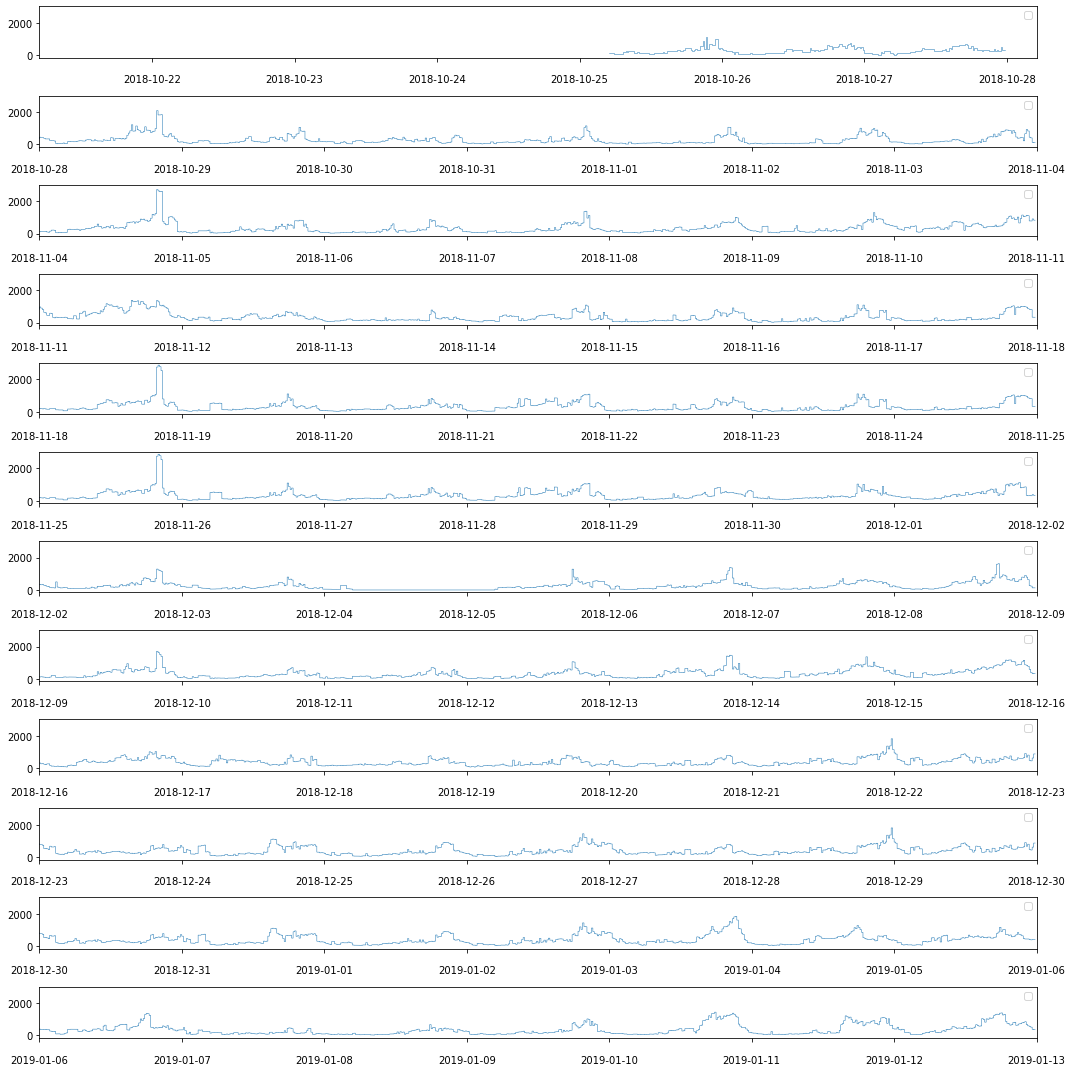

In [10]:
plot_split_timeseries(plot_data, split_freq = "1W", split_max = 12)
plt.tight_layout()

Takeaway: This is another one that has fluctuations in weekly seasonality that could create issues differentiating between the zero and non-zero states?

# Case Study # 3: DMA = 602, Demo = 11, Network = 764 <a class="anchor" id="third">

### Bad initial energy

In [11]:
df3 = pd.read_parquet('s3://ncc-datasci-dev/impressions_pop_dmn/dma_code=602/demo_id=11/network_id=764')
df3.head()

,dt,impressions,population_size,demo_id,dma_code,network_id,demo_gender,demo_age_range,market,network
0,2018-10-27 04:00:00,0,3343812.0,11,602,764,A,25-54,Chicago,NBC Sports Network
1,2018-10-26 10:15:00,0,3343812.0,11,602,764,A,25-54,Chicago,NBC Sports Network
2,2018-10-26 23:15:00,0,3343812.0,11,602,764,A,25-54,Chicago,NBC Sports Network
3,2018-10-26 18:00:00,0,3343812.0,11,602,764,A,25-54,Chicago,NBC Sports Network
4,2018-10-28 00:15:00,0,3343812.0,11,602,764,A,25-54,Chicago,NBC Sports Network


In [12]:
plot_data = df3.set_index('dt')[['impressions']]
plot_data

,impressions
dt,
2018-10-27 04:00:00,0
2018-10-26 10:15:00,0
2018-10-26 23:15:00,0
2018-10-26 18:00:00,0
2018-10-28 00:15:00,0
...,...
2019-12-04 06:15:00,0
2019-12-01 21:30:00,0
2019-12-04 09:00:00,0


# Monthly Visual

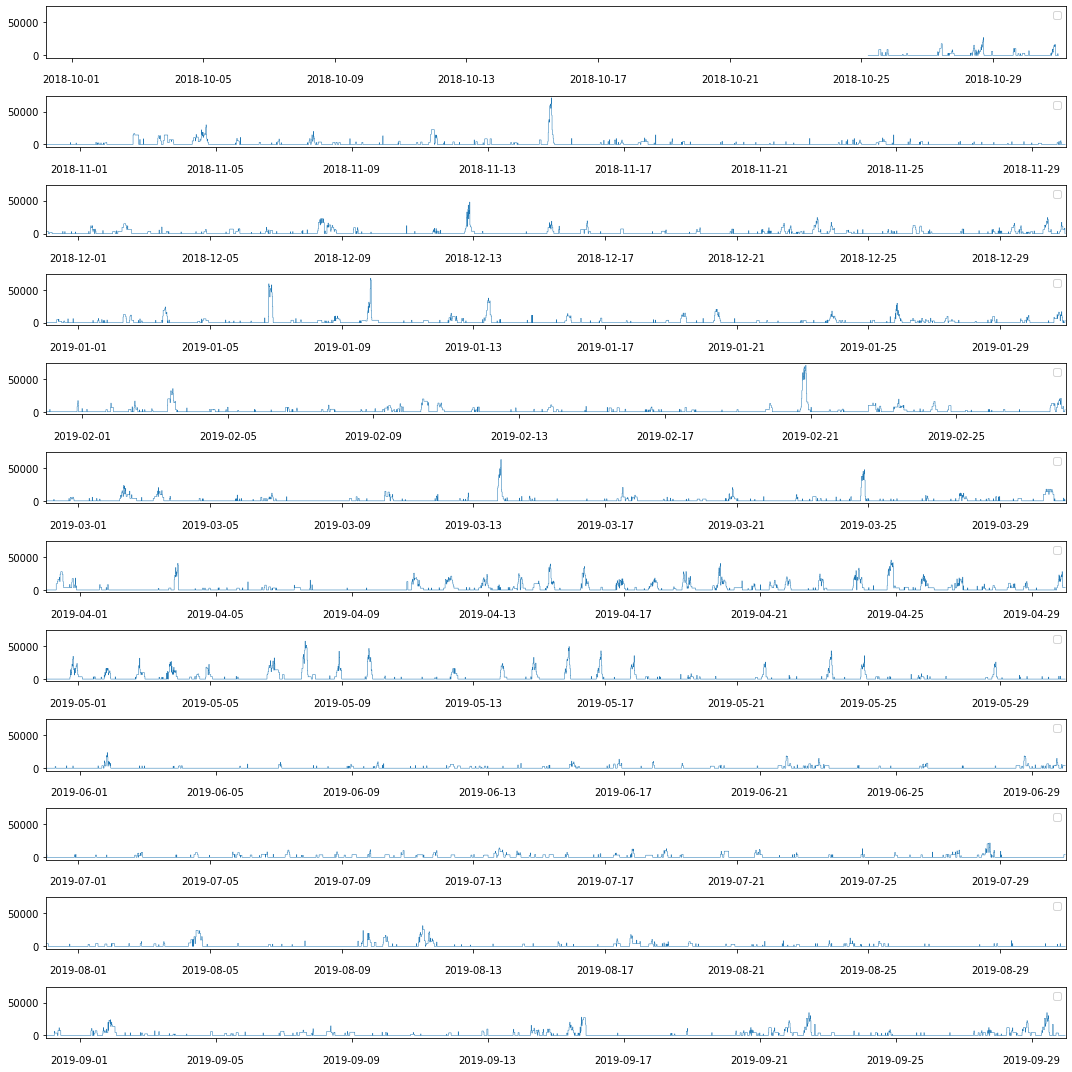

In [13]:
plot_split_timeseries(plot_data, split_freq = "1M", split_max = 12)
plt.tight_layout()

# Weekly Visual

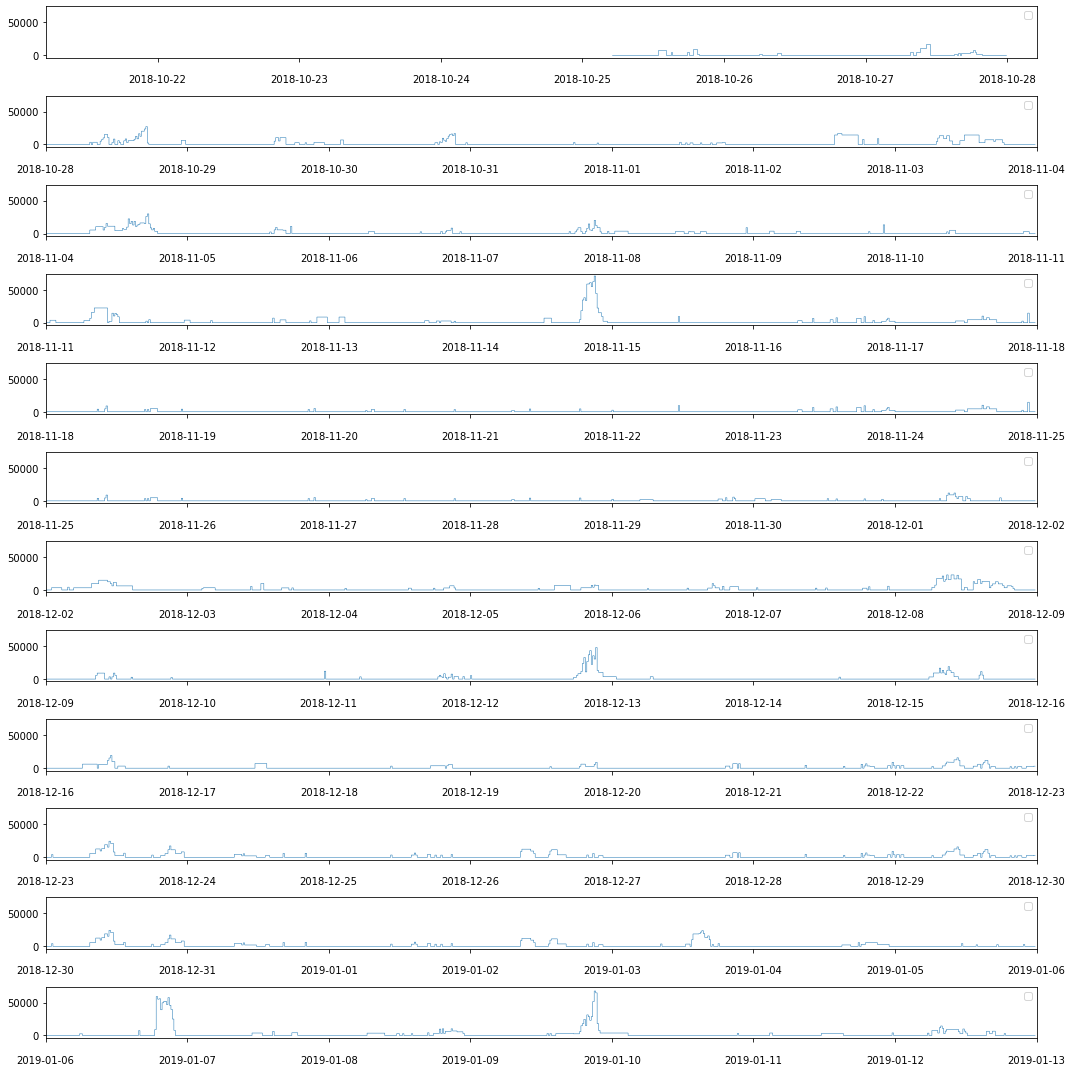

In [20]:
plot_split_timeseries(plot_data, split_freq = "1W", split_max = 12)
plt.tight_layout()

# Case Study # 4: DMA = 801, Demo = 11, Network = 889 <a class="anchor" id="fourth">

### Bad initial energy

In [14]:
df4 = pd.read_parquet('s3://ncc-datasci-dev/impressions_pop_dmn/dma_code=801/demo_id=11/network_id=889')
df4.head()

,dt,impressions,population_size,demo_id,dma_code,network_id,demo_gender,demo_age_range,market,network
0,2018-10-27 12:45:00,1742,165966.0,11,801,889,A,25-54,Eugene-Springfield,Pac-12 Regional Network
1,2018-10-25 05:00:00,0,165966.0,11,801,889,A,25-54,Eugene-Springfield,Pac-12 Regional Network
2,2018-10-31 03:00:00,11,165966.0,11,801,889,A,25-54,Eugene-Springfield,Pac-12 Regional Network
3,2018-10-27 10:00:00,32,165966.0,11,801,889,A,25-54,Eugene-Springfield,Pac-12 Regional Network
4,2018-11-03 02:00:00,5,165966.0,11,801,889,A,25-54,Eugene-Springfield,Pac-12 Regional Network


In [15]:
plot_data = df4.set_index('dt')[['impressions']]
plot_data

,impressions
dt,
2018-10-27 12:45:00,1742
2018-10-25 05:00:00,0
2018-10-31 03:00:00,11
2018-10-27 10:00:00,32
2018-11-03 02:00:00,5
...,...
2019-12-01 17:30:00,60
2019-11-26 18:30:00,76
2019-12-03 06:30:00,2


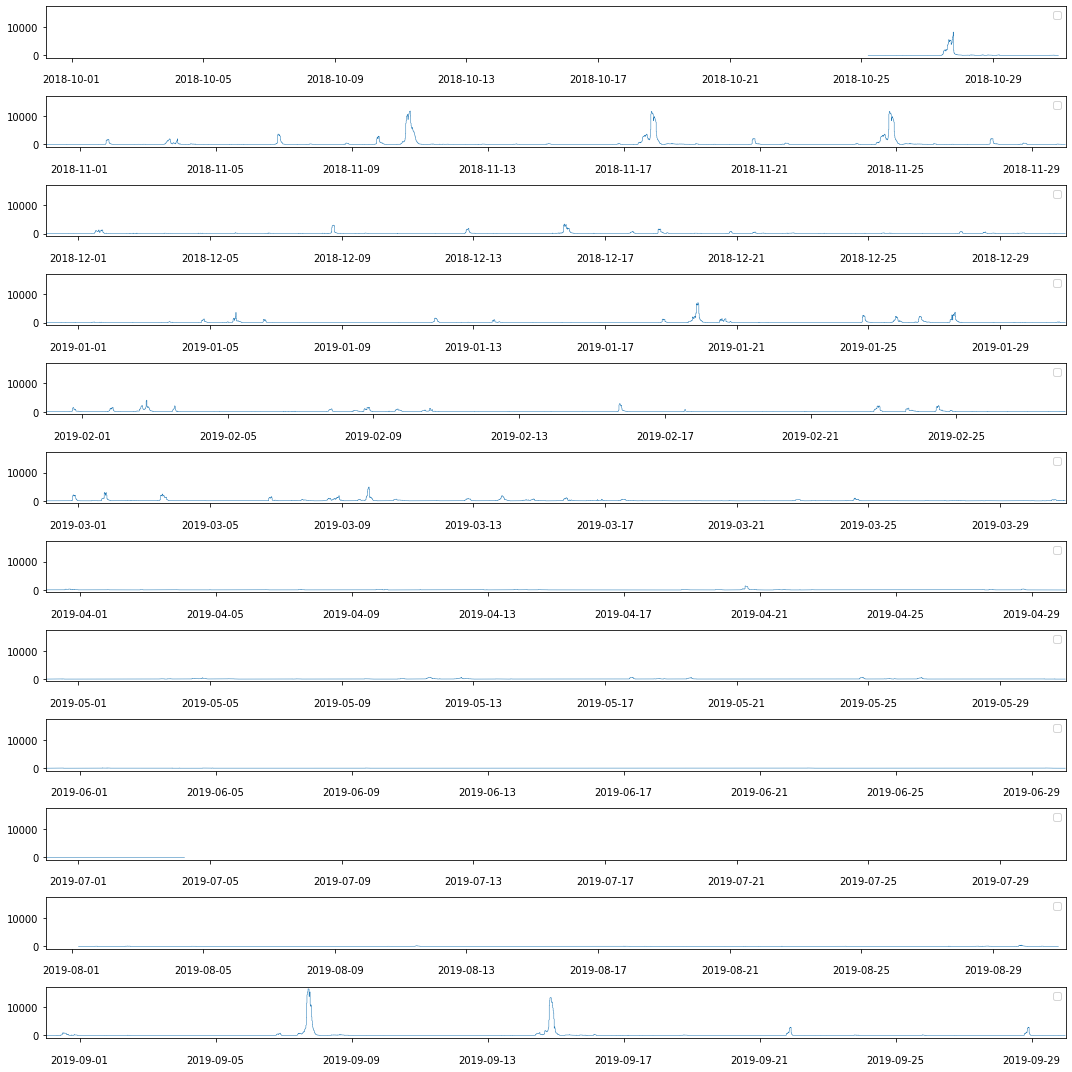

In [16]:
plot_split_timeseries(plot_data, split_freq = "1M", split_max = 12)
plt.tight_layout()

It seems like it would be really challenging to predict these peaks without additional predictor variables

# Case Study # 5: DMA = 752, Demo = 11, Network = 150 <a class="anchor" id="fifth">

### Bad initial energy

In [17]:
df5 = pd.read_parquet('s3://ncc-datasci-dev/impressions_pop_dmn/dma_code=752/demo_id=11/network_id=150')
df5.head()

,dt,impressions,population_size,demo_id,dma_code,network_id,demo_gender,demo_age_range,market,network
0,2018-10-27 03:30:00,307,290490.0,11,752,150,A,25-54,Colorado Springs,Turner Network Television
1,2018-10-25 13:30:00,365,290490.0,11,752,150,A,25-54,Colorado Springs,Turner Network Television
2,2018-10-27 08:15:00,258,290490.0,11,752,150,A,25-54,Colorado Springs,Turner Network Television
3,2018-10-26 01:15:00,650,290490.0,11,752,150,A,25-54,Colorado Springs,Turner Network Television
4,2018-10-25 19:45:00,1605,290490.0,11,752,150,A,25-54,Colorado Springs,Turner Network Television


In [18]:
plot_data = df5.set_index('dt')[['impressions']]
plot_data

,impressions
dt,
2018-10-27 03:30:00,307
2018-10-25 13:30:00,365
2018-10-27 08:15:00,258
2018-10-26 01:15:00,650
2018-10-25 19:45:00,1605
...,...
2019-11-23 04:15:00,183
2019-11-25 18:45:00,761
2019-11-28 10:45:00,367


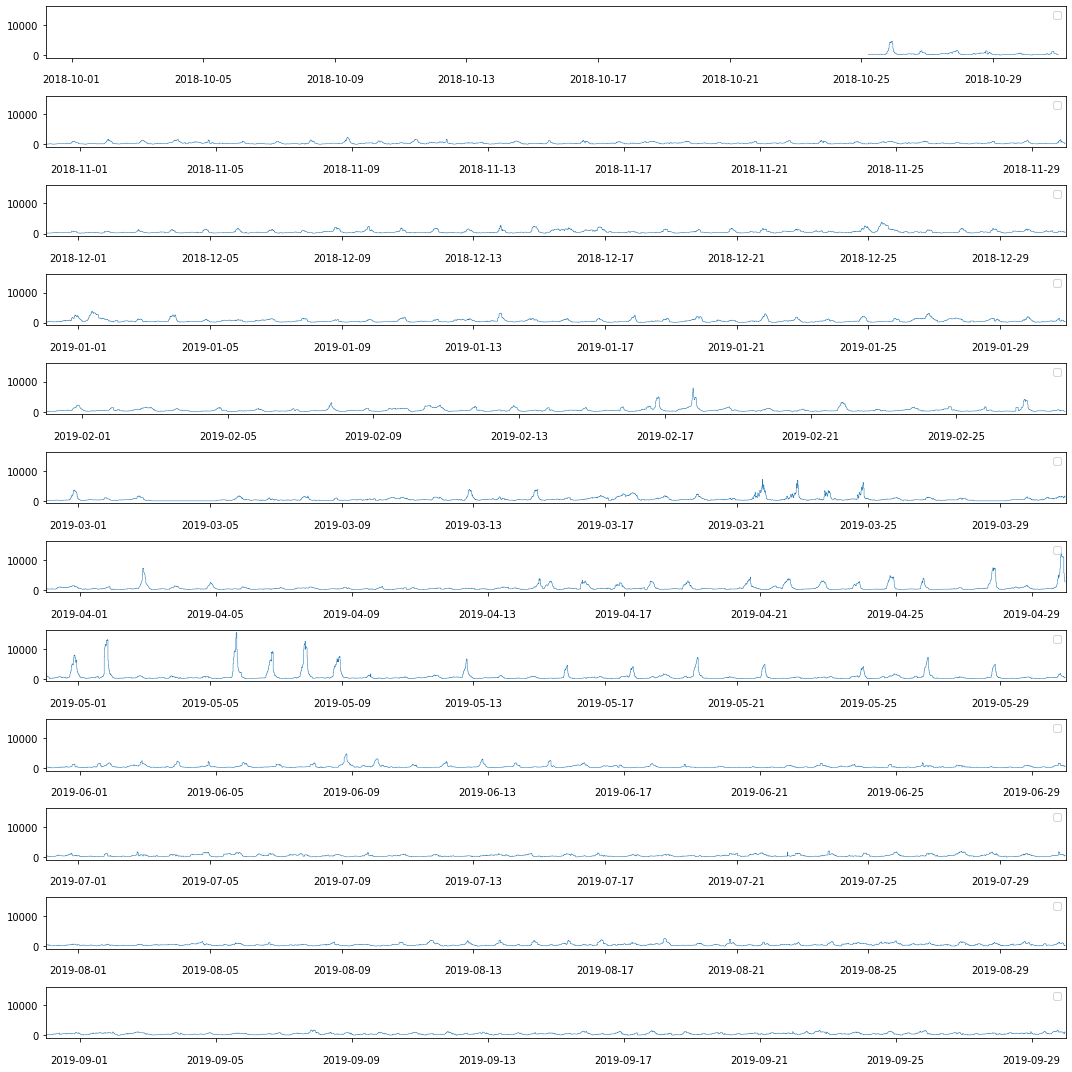

In [19]:
plot_split_timeseries(plot_data, split_freq = "1M", split_max = 12)
plt.tight_layout()

Takeaway: TNT (Network = 150) is a highly sold network, but perhaps Colorado Springs is a "low traffic" DMA that tends to report low levels of impressions (compared to DMA's like Chicago, LA, Dallas, DC etc). Occasionally, TNT sees spikes in viewership that are not typical which could result in difficulties fitting our model.